In [ ]:
fund=['ANWPX','BCSIX','BCSSX','DODBX','LSIIX','LSIOX','POAGX','POSKX','WGROX','VPCCX','VIMAX','RPMGX','YACKX','PRWCX','TRBCX']
stock=[[] for i in range(len(fund))]

for j in range(len(fund)):
    a='_2018.csv'
    doc=fund[j]+a

    fi = open(doc,'r',encoding='utf-8-sig')
    for line in fi:
        line=line.lstrip()
        line_str = line.split()
        if len(line_str) ==0 :
            continue
        if any("%" in s for s in line_str):
            continue
        name=""
        for k in range(len(line_str)):
            if 'Inc' in line_str[k]:
                break
            if 'Corp' in line_str[k]:
                break
            if 'Ltd' in line_str[k]:
                break
            if 'Co.' in line_str[k]:
                break
            if 'Class' in line_str[k]:
                break
            if 'PLC' in line_str[k]:
                break
            if 'SA' in line_str[k]:
                break
            if 'AG' in line_str[k]:
                break
            if '(' in line_str[k]:
                break
            if 'ADR' in line_str[k]:
                break
            if '*' in line_str[k]:
                if k==0:
                    continue
                else:
                    break
            if 'Other' in line_str[k]:
                break
            if (list(set(line_str[k]))[0] == ',' or line_str[k] == "") :
                continue
            if line_str[k][-1] == ',':
                line_str[k] = line_str[k][:-1]
            name+=(line_str[k]+'_')
        if name =='':
            continue
        if name.startswith('Total'):
            continue
        if name.startswith('_'):
            name=name[1:]
        stock[j].append(name[:-1])
    fi.close()

print(stock[0])

In [2]:
def equal(s1,s2):
    s1l = s1.split('_')
    s2l = s2.split('_')
    l = min(len(s1l),len(s2l))
    for i in range(l):
        if (s1l[i] != s2l[i]):
            return False
    return True

def IsIn(string, List):
    for s in List:
        if equal(string,s):
            return True
    return False

summary = []
for array in stock:
    for i in range(len(array)):
        if not IsIn(array[i] , summary) :
            summary.append(array[i])

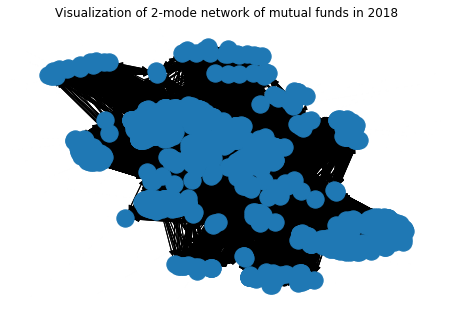

In [3]:
import numpy as np

matrix = np.zeros((len(summary),len(stock)))

for i in range(len(stock)):
    for j in range(len(summary)):
        if IsIn(summary[j],stock[i]):
            matrix[j,i] = 1
            
matrix_tr=matrix.transpose()
mod_2=np.dot(matrix,matrix_tr)
np.savetxt("2018.csv", mod_2, delimiter=",")

import pandas as pd
df=pd.read_csv("2018.csv",header=None)
df.columns=summary
df['row']=summary
df.set_index('row', inplace=True)

import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph(df.values)
nx.draw(G)
plt.title("Visualization of 2-mode network of mutual funds in 2018")
plt.show()

In [4]:
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G)
# Degree centrality
deg_cen = nx.degree_centrality(G)

In [5]:
sorted_x = sorted(eig_cen.items(), key=lambda kv: kv[1])
print(sorted_x[-10:])

[(538, 0.04820432431889292), (540, 0.04820432431889292), (543, 0.04820432431889292), (225, 0.048279218819089795), (509, 0.04828296749201574), (517, 0.04828296749201574), (18, 0.04835955106800613), (271, 0.04838263970514403), (3, 0.048438194241128954), (57, 0.049751131425600725)]


In [6]:
sorted_y = sorted(deg_cen.items(), key=lambda kv: kv[1])
print(sorted_y[-10:])

[(115, 1.2557349192863212), (271, 1.2574341546304164), (3, 1.2676295666949873), (132, 1.2965165675446049), (126, 1.3814783347493629), (129, 1.3814783347493629), (421, 1.3916737468139337), (202, 1.447748513169074), (382, 1.5327102803738317), (57, 1.7570093457943925)]


In [7]:
eig_index=[57,3,271,18,517,509,225,543,540,538]
for i in eig_index:
    print(summary[i],'\t',end='')

American 	Microsoft 	Texas_Instruments 	JPMorgan_Chase_& 	Marsh_&_McLennan 	Philip_Morris_International 	Union_Pacific 	Norfolk_Southern 	Honeywell_International 	Delta_Air_Lines 	

In [8]:
deg_index=[57,382,202,421,129,126,132,3,271,115]
for i in deg_index:
    print(summary[i],'\t',end='')

American 	Cabot 	Bank_of_America 	NextEra_Energy_Partners 	Ulta_Beauty 	Norwegian_Cruise_Line_Holdings 	Charles_Schwab 	Microsoft 	Texas_Instruments 	Carnival 	

In [12]:
import pandas_datareader.data as web
import datetime

eigen_ticker=['AAL','MSFT','TXN','JPM','MMC','PM','UNP','NSC','HON','DAL']
deg_ticker=['AAL', 'COG','BAC','NEP','ULTA','NCLH','SCHW','MSFT','TXN','CCL']
eigen=[]
deg=[]
for i in range(len(eigen_ticker)):
    eigen.append(web.DataReader(eigen_ticker[i], "yahoo",\
                                datetime.datetime(2018,1,1),datetime.datetime(2018,12,31)))
    
for i in range(len(deg_ticker)):
    deg.append(web.DataReader(deg_ticker[i], "yahoo",datetime.datetime(2018,1,31),datetime.datetime(2018,12,31)))
    

In [13]:
def Profit(stocks):
    p = 0.0
    op=0.0
    close=0.0
    for i in range(len(stocks)):
        open_price = stocks[i]["Open"].iloc[0]
        close_price = stocks[i]["Close"].iloc[-1]
        op+=open_price
        close+=close_price
    p = (close - op)/op
    return p

In [15]:
num=5
profit_list_1 =[]
profit_list_2 =[]
while True:
    s1 = False
    s2 = False
    if num <= len(eigen): 
        profit_list_1.append(Profit(eigen[:num]))
    else:
        s1 = True
    if num <= len(deg):
        profit_list_2.append(Profit(deg[:num]))
    else:
        s2 = True
    num+=1
    if (s1 and s2):
        break

In [16]:
print (profit_list_1)

[-0.06348141201870675, -0.12350144501323293, -0.09357601853980137, -0.0725415930376369, -0.07731321353125507, -0.07930494690359512]


In [17]:
print (profit_list_2)

[-0.04120077790083599, -0.0753907538084142, -0.09127370019035201, -0.06351387484821229, -0.07696918879725856, -0.09894662097520908]


In [18]:
eigen_ticker_2019=['AAL','MSFT','TXN','JPM','MMC','PM','UNP','NSC','HON','DAL']
deg_ticker_2019=['AAL', 'COG','BAC','NEP','ULTA','NCLH','SCHW','MSFT','TXN','CCL']
eigen_2019=[]
deg_2019=[]
for i in range(len(eigen_ticker_2019)):
    eigen_2019.append(web.DataReader(eigen_ticker_2019[i], "yahoo",\
                                datetime.datetime(2019,1,1),datetime.datetime(2019,5,3)))
    
for i in range(len(deg_ticker_2019)):
    deg_2019.append(web.DataReader(deg_ticker_2019[i], "yahoo",datetime.datetime(2019,1,1),datetime.datetime(2019,5,3)))
    

In [21]:
num=5
profit_list_1 =[]
profit_list_2 =[]
while True:
    s1 = False
    s2 = False
    if num <= len(eigen): 
        profit_list_1.append(Profit(eigen_2019[:num]))
    else:
        s1 = True
    if num <= len(deg):
        profit_list_2.append(Profit(deg_2019[:num]))
    else:
        s2 = True
    num+=1
    if (s1 and s2):
        break
print(profit_list_1)
print(profit_list_2)

[0.23264567876633957, 0.2416539261026486, 0.2595961652504715, 0.2862954917200954, 0.29322192133856756, 0.2868643494738259]
[0.328200393044419, 0.3347252900760515, 0.3164785214378319, 0.3125057136085235, 0.3057719434945179, 0.2930215208853487]
